In [ ]:
%load_ext autoreload
%autoreload 2

import os
import fitz
import json
from PIL import Image
import io


from utils import create_text_lines
from detect_language import detect_language_of_document
from TOCExtractor import TOCExtractor
import yaml
base_dir = os.getcwd()

In [2]:
pdf_path = "data/NAB/Berichte_NAB 10-025_Kurzarbeitsprogram Geothermiebohrung Schlattingen.PDF"
output_path = "data/predictions.json"

with open(os.path.join(base_dir, "matching_params.yml"), "r") as params_file:
    matching_params = yaml.safe_load(params_file)

In [8]:
with fitz.open(pdf_path) as doc:

    text_lines = create_text_lines(doc) 
    language = detect_language_of_document(doc)

    extractor = TOCExtractor(matching_params)

    # Extract the TOC
    table_of_content = extractor.extract_toc(doc,text_lines, language)

    # Output results
    if table_of_content:
        for entry in table_of_content.entries:
            print(f"Header: {entry['header']}, Page: {entry['page']}")
    else:
        print("No TOC found.")
    
    print(table_of_content)

First unmatched line: Tabellenverzeichnis
Header: Inhaltsverzeichnis, Page: I
Header: Tabellenverzeichnis, Page: I
Header: Figurenverzeichnis, Page: II
Header: Einleitung und Zielsetzung, Page: 1
Header: Geologie, Page: 3
Header: Beschreibung des Untersuchungsgebietes, Page: 3
Header: Prognose Bohrprofil, Page: 6
Header: Bohrarbeiten, Page: 7
Header: Bohrspülung, Page: 9
Header: Vorgesehene Untersuchungen, Page: 11
Header: Bohrstellen-Geologie, Page: 11
Header: Bohrloch-Geophysik, Page: 13
Header: Hydrogeologie und Hydrochemie, Page: 16
Header: Geotechnik und Felsmechanik, Page: 19
Header: Bohrplatz, Page: 23
Header: Projektorganisation, Page: 25
Header: Referenzen, Page: 27
TOC(entries=[{'header': 'Inhaltsverzeichnis', 'page': 'I'}, {'header': 'Tabellenverzeichnis', 'page': 'I'}, {'header': 'Figurenverzeichnis', 'page': 'II'}, {'header': 'Einleitung und Zielsetzung', 'page': '1'}, {'header': 'Geologie', 'page': '3'}, {'header': 'Beschreibung des Untersuchungsgebietes', 'page': '3'}, {

In [41]:
with open(output_path, "w", encoding = "utf-8") as file:
    json.dump(table_of_content, file)

In [3]:
def show_image(item, title=""):
    DPI = 150  # use this resolution
    import numpy as np
    import matplotlib.pyplot as plt

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

if not hasattr(fitz.Page, "find_tables"):
    raise RuntimeError("This PyMuPDF version does not support the table feature")

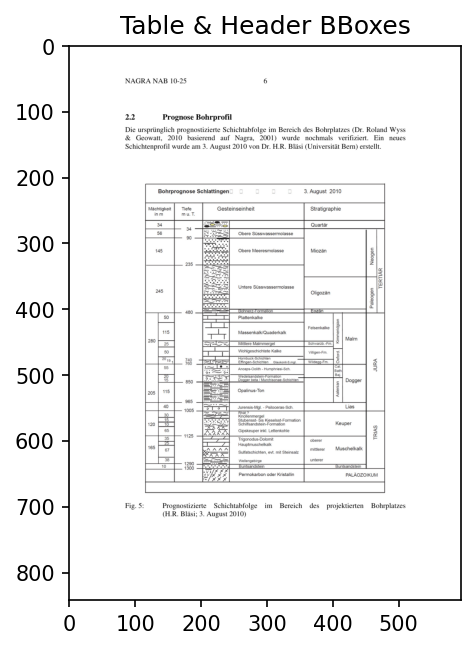

In [21]:
with fitz.Document(pdf_path) as doc:
    page = doc[11]
    tabs = page.find_tables()  # detect the tables
    for i,tab in enumerate(tabs):  # iterate over all tables
        for cell in tab.header.cells:
            page.draw_rect(cell,color=fitz.pdfcolor["red"],width=0.3)
        page.draw_rect(tab.bbox,color=fitz.pdfcolor["green"])
        print(f"Table {i} column names: {tab.header.names}, external: {tab.header.external}")
        
    show_image(page, f"Table & Header BBoxes")